In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def gauss1(x, A, mu, sigma):
    y=A*np.exp(-(x-mu)**2/(2.*sigma**2))
    return y
def gauss2(x, A, mu, sigma):
    y=A*np.exp(-(x-mu)**2/(2.*sigma**2))
    return y

def double_gauss (x, A, B, mu1, sigma1, mu2, sigma2):
    y= A*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + B*np.exp(-(x-mu2)**2/(2.*sigma2**2))
    return y


In [3]:
#Cylin='/mnt/c/Users/Christopher Crawford/Desktop/ShimOnlyFinalDim_v2.txt'
#Cylin='/mnt/c/Users/Christopher Crawford/Desktop/StLineSimOnly.txt'
#Cylin='/mnt/c/Users/Christopher Crawford/Desktop/StLineFinalDimShimOnly.txt'
Cylin='/mnt/c/Users/Christopher Crawford/Desktop/StLineFinalShimOnlyDim_Final.txt'


In [4]:
pc=pd.read_csv(Cylin,delim_whitespace=True)
T_Cy1 = pd.DataFrame(pc)
T_Cy=T_Cy1.dropna()
T_Cy=T_Cy.reset_index(drop=True)

In [5]:
T_Cy["x"]=T_Cy["x"]*100
T_Cy["y"]=T_Cy["y"]*100
T_Cy["z"]=T_Cy["z"]*100

T_Cy=T_Cy.round(4)
T_Cy.duplicated().any()

False

In [6]:
T_Cy

,x,y,z,Bx,By,Bz
0,0.01,0.01,50.0,-0.0031,0.0031,0.0000
1,0.11,0.01,50.0,-0.0333,0.0030,-0.0006
2,0.21,0.01,50.0,-0.0635,0.0030,-0.0021
3,0.31,0.01,50.0,-0.0939,0.0027,-0.0045
4,0.41,0.01,50.0,-0.1245,0.0030,-0.0079
...,...,...,...,...,...,...
1302089,6.91,6.91,100.0,-0.1571,0.1571,0.0000
1302090,7.01,6.91,100.0,-0.1592,0.1571,0.0000
1302091,6.81,7.01,100.0,-0.1551,0.1593,-0.0001
1302092,6.91,7.01,100.0,-0.1572,0.1593,-0.0000


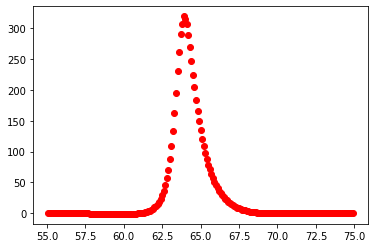

In [7]:
#plot the selected data
df = T_Cy.loc[(abs(T_Cy['x']) == 0.11) & (abs(T_Cy['y']) == 0.11) & (abs(T_Cy['z']) > 55) & (abs(T_Cy['z']) < 75)  ]
#plt.ylim(3,4)
plt.scatter(df["z"],df["Bx"], color='r')

In [8]:
# curve fit
parameters, covariance = curve_fit(double_gauss, df['z'], df['Bx'],[100, 50, 65, 1.5, 63., 0.69])

In [10]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
fit_E = parameters[4]
fit_F = parameters[5]
print(fit_A,fit_B,fit_C,fit_D,fit_E,fit_F)

119.67659508015512 211.44793366774178 64.51185112957822 1.1173652060714734 63.91358860909432 0.503095353076727


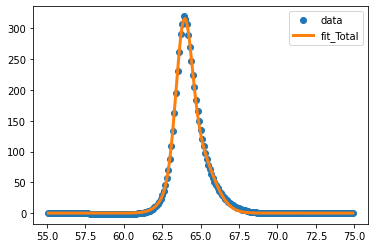

In [11]:
fit_y = double_gauss(df['z'], fit_A, fit_B, fit_C,fit_D,fit_E,fit_F)

plt.plot(df['z'], df['Bx'], 'o', label='data')
plt.plot(df['z'], fit_y, '-', label='fit_Total',lw=3)
plt.legend()